<a href="https://colab.research.google.com/github/rahiakela/data-science-research-and-practice/blob/main/data-science-bookcamp/case-study-5--predicting-future-friendships/04_linear_classifiers_with_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Linear Classifiers with Logistic Regression

In this notebook, we simulated customer heights (in inches) and weights (in pounds). We’ll now proceed to re-run that simulation. 

For the purpose of this exercise, we’ll focus on the two classes; _Large_ and _Not Large_. 

We’ll assume that customers within the _Large_ class are taller than 72 inches and heavier than 160 lb.

##Setup

In [1]:
import re
import glob
import time
import numpy as np
import pandas as pd

from collections import Counter
from collections import defaultdict

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def plot_customers(X, y, xlabel='Inches (in)', ylabel='Pounds (lb)'):
  colors = ['g', 'y']
  labels = ['Not Large', 'Large']
  for i, (color, label) in enumerate(zip(colors, labels)):
      plt.scatter(X[:,0][y == i], X[:,1][y == i], color=color, label=label)
  
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

##Dataset

In [4]:
# Simulating Categorized Customer Measurements
np.random.seed(1)

inches = np.arange(60, 78, 0.1)
random_fluctuations = np.random.normal(scale=10, size=inches.size)
pounds = 4 * inches - 130 + random_fluctuations

X = np.array([inches, pounds]).T
y = ((X[:, 0] > 72) & (X[:, 1] > 60)).astype(int)

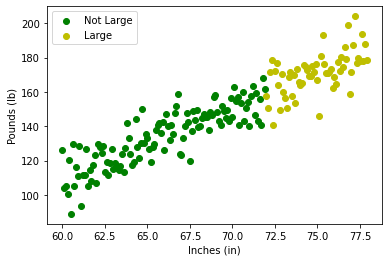

In [5]:
plot_customers(X, y)
plt.legend()
plt.show()

##Linear Classifier

We can image a knife slicing through the cigar-shaped plot, in order to separate the colors. The knife acts like a boundary that separates the two customer classes. 

We can represent this boundary using a line with slope of -3.5 and a y-intercept of 415.

In [13]:
# Plotting a boundary to separate the two customer classes
y_pred = []

for inches, lbs in X:
  prediction = int(lbs > -3.5 * inches + 415)
  y_pred.append(prediction)

f_measure = f1_score(y_pred, y)
print(f"The f-measure is {f_measure:.2f}")

The f-measure is 0.92


We can run the classification more concisely using vector dot products.

In [14]:
# Predicting classes using vector dot products
weights = np.array([3.5, 1, -415])

predictions = [int(weights @ [inches, lbs, 1] > 0) for inches, lbs in X]
assert predictions == y_pred

We can further consolidate our code if we use matrix multiplication.

In [15]:
# Predicting classes using matrix multiplication
M = np.column_stack([X, np.ones(X.shape[0])])
print(f"First five rows of our padded feature matrix are: \n{np.round(M[:5], 2)}")

predictions = (M @ weights > 0).astype(int)
assert predictions.tolist() == y_pred

First five rows of our padded feature matrix are: 
[[ 60.   126.24   1.  ]
 [ 60.1  104.28   1.  ]
 [ 60.2  105.52   1.  ]
 [ 60.3  100.47   1.  ]
 [ 60.4  120.25   1.  ]]


We've boiled down customer classification to a simple matrix-vector product.

This matrix-product classifier is called a **linear classifier**.

In [16]:
# Defining a linear classifier function
def linear_classifier(X, weights):
  M = np.column_stack([X, np.ones(X.shape[0])])
  return (M @ weights > 0).astype(int)

predictions = linear_classifier(X, weights)
assert predictions.tolist() == y_pred

Linear classifiers check whether weighted features and a constant add-up to a value greater than zero. 

The constant-value, which is stored in `weights[-1]`, is referred to as the **bias**. 

Meanwhile, the remaining weights are called the **coefficients**.

##Training Linear Classifier

We want to find a weight vector that optimizes class prediction on `X`. 

Lets start by setting `weights` to equal three random values.


In [ ]:
# Classification using random weights
